In [1]:
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm

# Custom package
sys.path.append('/home/rrp000/sea_ice/code/')
from icepack import get_dataset
from icepack.analysis import *
from icepack.splot import *

# Some useful lists and dicts
monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']
monthstr = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthdict = {1:r'$\mathbf{January}$',
             2:r'$\mathbf{February}$',
             3:r'$\mathbf{March}$',
             4:r'$\mathbf{April}$',
             5:r'$\mathbf{May}$',
             6:r'$\mathbf{June}$',
             7:r'$\mathbf{July}$',
             8:r'$\mathbf{August}$',
             9:r'$\mathbf{September}$',
             10:r'$\mathbf{October}$',
             11:r'$\mathbf{November}$',
             12:r'$\mathbf{December}$'}

method = 'mean'
daterange = (1990,2014)
daterange_clim = (1990,2014)
mask = xr.open_dataset("~/sea_ice/data/masks/land_all.nc")

In [2]:
# open data
sic = get_dataset('Had2CIS')

sie_Had2CIS = get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble=None)
sie_anom_Had2CIS = get_anomalies(sie_Had2CIS,'SIE',ref_period=daterange)
sie_clim_Had2CIS = get_climatology(sie_Had2CIS,var='SIE',ref_period=daterange_clim)

sia_Had2CIS = get_icearea(sic, mask, lat_bounds=(-90,0), ensemble=None)
sia_anom_Had2CIS = get_anomalies(sia_Had2CIS,'SIA',ref_period=daterange)
sia_clim_Had2CIS = get_climatology(sia_Had2CIS,var='SIA',ref_period=daterange_clim)

In [3]:
# open data
sic = get_dataset('OSI-SAF')

# calculate SIE and anomalies
sie_OSISAF = get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)
sie_anom_OSISAF = get_anomalies(sie_OSISAF,'SIE',ref_period=daterange)
sie_clim_OSISAF = get_climatology(sie_OSISAF,var='SIE',ref_period=daterange_clim)

# calculate SIA and anomalies
sia_OSISAF = get_icearea(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)
sia_anom_OSISAF = get_anomalies(sia_OSISAF,'SIA',ref_period=daterange)
sia_clim_OSISAF = get_climatology(sia_OSISAF,var='SIA',ref_period=daterange_clim)

In [4]:
# open data
sic = get_dataset('NSIDC')

# calculate SIE and anomalies
sie_NSIDC = get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble=None, dslabels={'sic':'cdr_seaice_conc'})
sie_anom_NSIDC = get_anomalies(sie_NSIDC,'SIE',ref_period=daterange)
sie_clim_NSIDC = get_climatology(sie_NSIDC,var='SIE',ref_period=daterange_clim)

# calculate SIA and anomalies
sia_NSIDC = get_icearea(sic, mask, lat_bounds=(-90,0), ensemble=None, dslabels={'sic':'cdr_seaice_conc'})
sia_anom_NSIDC = get_anomalies(sia_NSIDC,'SIA',ref_period=daterange)
sia_clim_NSIDC = get_climatology(sia_NSIDC,var='SIA',ref_period=daterange_clim)

In [5]:
# open data and format time
sic_CanESM50_init = get_dataset('CanESM5.0_i')
sic_CanESM50_init = [format_time_coord(data,f'1981-{monthstr[i]}',f'202{int(np.heaviside(i,0))}-{monthstr[i-1]}',freq='M') for i,data in enumerate(sic_CanESM50_init)]

# calculate SIE (ensemble mean) and SIE anomalies
print("Calculating SIE/SIA")
sie_CanESM50_init = []
sia_CanESM50_init = []
for i,sic in enumerate(sic_CanESM50_init):
    sie_CanESM50_init.append(get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble='mean', multiply_input_by=1e-2))
    sia_CanESM50_init.append(get_icearea(sic, mask, lat_bounds=(-90,0), ensemble='mean', multiply_input_by=1e-2))
sie_anom_CanESM50_init = [get_anomalies(sie,'SIE',ref_period=daterange) for sie in sie_CanESM50_init]
sia_anom_CanESM50_init = [get_anomalies(sia,'SIA',ref_period=daterange) for sia in sia_CanESM50_init]

# add a lead time coordinate to the SIE data set
print("Adding a lead time coordinate")
for i in range(len(sie_CanESM50_init)):
    im = i + 1
    sie_CanESM50_init[i]['lead'] = (sie_CanESM50_init[i]['time.month'] - im)%12
    sie_anom_CanESM50_init[i]['lead'] = (sie_anom_CanESM50_init[i]['time.month'] - im)%12
    sia_CanESM50_init[i]['lead'] = (sia_CanESM50_init[i]['time.month'] - im)%12
    sia_anom_CanESM50_init[i]['lead'] = (sia_anom_CanESM50_init[i]['time.month'] - im)%12

# re-sort by leadtime
sie_CanESM50_init_lt = [xr.merge([sie_CanESM50_init[im-1].where(sie_CanESM50_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sie_anom_CanESM50_init_lt = [xr.merge([sie_anom_CanESM50_init[im-1].where(sie_anom_CanESM50_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_CanESM50_init_lt = [xr.merge([sia_CanESM50_init[im-1].where(sia_CanESM50_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_anom_CanESM50_init_lt = [xr.merge([sia_anom_CanESM50_init[im-1].where(sia_anom_CanESM50_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]

# Calculate climatology
sie_clim_CanESM50_init = [get_climatology(sie,var='SIE',ref_period=daterange_clim) for sie in sie_CanESM50_init_lt]
sia_clim_CanESM50_init = [get_climatology(sia,var='SIA',ref_period=daterange_clim) for sia in sia_CanESM50_init_lt]

Calculating SIE/SIA
Adding a lead time coordinate


In [6]:
sic_CanESM5_init = get_dataset('CanESM5.1_i')
sic_CanESM5_init = [format_time_coord(data,f'1980-{monthstr[i]}',f'202{3+int(np.heaviside(i,0))}-{monthstr[i-1]}',freq='M') for i,data in enumerate(sic_CanESM5_init)]

# calculate SIE (ensemble mean) and SIE anomalies
print("Calculating SIE/SIA")
sie_CanESM5_init = []
sia_CanESM5_init = []
for i,sic in enumerate(sic_CanESM5_init):
    sie_CanESM5_init.append(get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble='mean', multiply_input_by=1e-2))
    sia_CanESM5_init.append(get_icearea(sic, mask, lat_bounds=(-90,0), ensemble='mean', multiply_input_by=1e-2))
sie_anom_CanESM5_init = [get_anomalies(sie,'SIE',ref_period=daterange) for sie in sie_CanESM5_init]
sia_anom_CanESM5_init = [get_anomalies(sia,'SIA',ref_period=daterange) for sia in sia_CanESM5_init]

# add a lead time coordinate to the SIE data set
print("Adding a lead time coordinate")
for i in range(len(sic_CanESM5_init)):
    im = i + 1
    sie_CanESM5_init[i]['lead'] = (sie_CanESM5_init[i]['time.month'] - im)%12
    sie_anom_CanESM5_init[i]['lead'] = (sie_anom_CanESM5_init[i]['time.month'] - im)%12
    sia_CanESM5_init[i]['lead'] = (sia_CanESM5_init[i]['time.month'] - im)%12
    sia_anom_CanESM5_init[i]['lead'] = (sia_anom_CanESM5_init[i]['time.month'] - im)%12

# re-sort by leadtime
sie_CanESM5_init_lt = [xr.merge([sie_CanESM5_init[im-1].where(sie_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sie_anom_CanESM5_init_lt = [xr.merge([sie_anom_CanESM5_init[im-1].where(sie_anom_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_CanESM5_init_lt = [xr.merge([sia_CanESM5_init[im-1].where(sia_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_anom_CanESM5_init_lt = [xr.merge([sia_anom_CanESM5_init[im-1].where(sia_anom_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]

# Calculate climatology
sie_clim_CanESM5_init = [get_climatology(sie,var='SIE',ref_period=daterange_clim) for sie in sie_CanESM5_init_lt]
sia_clim_CanESM5_init = [get_climatology(sia,var='SIA',ref_period=daterange_clim) for sia in sia_CanESM5_init_lt]

Calculating SIE/SIA
Adding a lead time coordinate


In [7]:
# open data and format time
sic_GEM5NEMO_init = get_dataset('GEM5.2-NEMO_i')
sic_GEM5NEMO_init = [format_time_coord(data,f'1990-{monthstr[i]}',f'202{int(np.heaviside(i,0))}-{monthstr[i-1]}',freq='M') for i,data in enumerate(sic_GEM5NEMO_init)]

# calculate SIE (ensemble mean) and SIE anomalies
print("Calculating SIE/SIA")
sie_GEM5NEMO_init = []
sia_GEM5NEMO_init = []
for i,sic in enumerate(sic_GEM5NEMO_init):
    sie_GEM5NEMO_init.append(get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble='mean'))
    sia_GEM5NEMO_init.append(get_icearea(sic, mask, lat_bounds=(-90,0), ensemble='mean'))
sie_anom_GEM5NEMO_init = [get_anomalies(sie,'SIE',ref_period=daterange) for sie in sie_GEM5NEMO_init]
sia_anom_GEM5NEMO_init = [get_anomalies(sia,'SIA',ref_period=daterange) for sia in sia_GEM5NEMO_init]

# add a lead time coordinate to the SIE data set, and resort by lead time
print("Adding a lead time coordinate")
for i in range(len(sie_GEM5NEMO_init)):
    im = i + 1
    sie_GEM5NEMO_init[i]['lead'] = (sie_GEM5NEMO_init[i]['time.month'] - im)%12
    sie_anom_GEM5NEMO_init[i]['lead'] = (sie_anom_GEM5NEMO_init[i]['time.month'] - im)%12
    sia_GEM5NEMO_init[i]['lead'] = (sia_GEM5NEMO_init[i]['time.month'] - im)%12
    sia_anom_GEM5NEMO_init[i]['lead'] = (sia_anom_GEM5NEMO_init[i]['time.month'] - im)%12
sie_GEM5NEMO_init_lt = [xr.merge([sie_GEM5NEMO_init[im-1].where(sie_GEM5NEMO_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sie_anom_GEM5NEMO_init_lt = [xr.merge([sie_anom_GEM5NEMO_init[im-1].where(sie_anom_GEM5NEMO_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_GEM5NEMO_init_lt = [xr.merge([sia_GEM5NEMO_init[im-1].where(sia_GEM5NEMO_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_anom_GEM5NEMO_init_lt = [xr.merge([sia_anom_GEM5NEMO_init[im-1].where(sia_anom_GEM5NEMO_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]

# Calculate climatology
sie_clim_GEM5NEMO_init = [get_climatology(sie,var='SIE',ref_period=daterange_clim) for sie in sie_GEM5NEMO_init_lt]
sia_clim_GEM5NEMO_init = [get_climatology(sia,var='SIA',ref_period=daterange_clim) for sia in sia_GEM5NEMO_init_lt]

Calculating SIE/SIA
Adding a lead time coordinate


In [8]:
# nudged runs
sic = get_dataset('CanESM5.1_nwt_1950_sic')
sie_CanESM5_wtn1950 = get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)
sie_anom_CanESM5_wtn1950 = get_anomalies(sie_CanESM5_wtn1950,'SIE',ref_period=daterange_clim)
sie_clim_CanESM5_wtn1950 = get_climatology(sie_CanESM5_wtn1950, var='SIE',ref_period=daterange_clim)
sia_CanESM5_wtn1950 = get_icearea(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)
sia_anom_CanESM5_wtn1950 = get_anomalies(sia_CanESM5_wtn1950,'SIA',ref_period=daterange_clim)
sia_clim_CanESM5_wtn1950 = get_climatology(sia_CanESM5_wtn1950, var='SIA',ref_period=daterange_clim)

sic = get_dataset('CanESM5.1_nw_1950_sic')
sie_CanESM5_wn1950 = get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)
sie_anom_CanESM5_wn1950 = get_anomalies(sie_CanESM5_wn1950,'SIE',ref_period=daterange_clim)
sie_clim_CanESM5_wn1950 = get_climatology(sie_CanESM5_wn1950, var='SIE',ref_period=daterange_clim)
sia_CanESM5_wn1950 = get_icearea(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)
sia_anom_CanESM5_wn1950 = get_anomalies(sia_CanESM5_wn1950,'SIA',ref_period=daterange_clim)
sia_clim_CanESM5_wn1950 = get_climatology(sia_CanESM5_wn1950, var='SIA',ref_period=daterange_clim)

In [9]:
# 2016-initialized + nudged runs

sic = xr.concat(get_dataset('CanESM5.1_inwt_sic'),dim='ensemble').mean(dim='ensemble')
sie_CanESM5_iwtn = get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)
sia_CanESM5_iwtn = get_icearea(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)

sic = xr.concat(get_dataset('CanESM5.1_inw_sic'),dim='ensemble').mean(dim='ensemble')
sie_CanESM5_iwn = get_iceextent(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)
sia_CanESM5_iwn = get_icearea(sic, mask, lat_bounds=(-90,0), ensemble=None, multiply_input_by=1e-2)

sie_anom_CanESM5_iwtn = get_anomalies(sie_CanESM5_iwtn,'SIE',ref_period=daterange_clim,ref_dataset=sie_CanESM50_init[0])
sie_anom_CanESM5_iwn = get_anomalies(sie_CanESM5_iwn,'SIE',ref_period=daterange_clim,ref_dataset=sie_CanESM50_init[0])

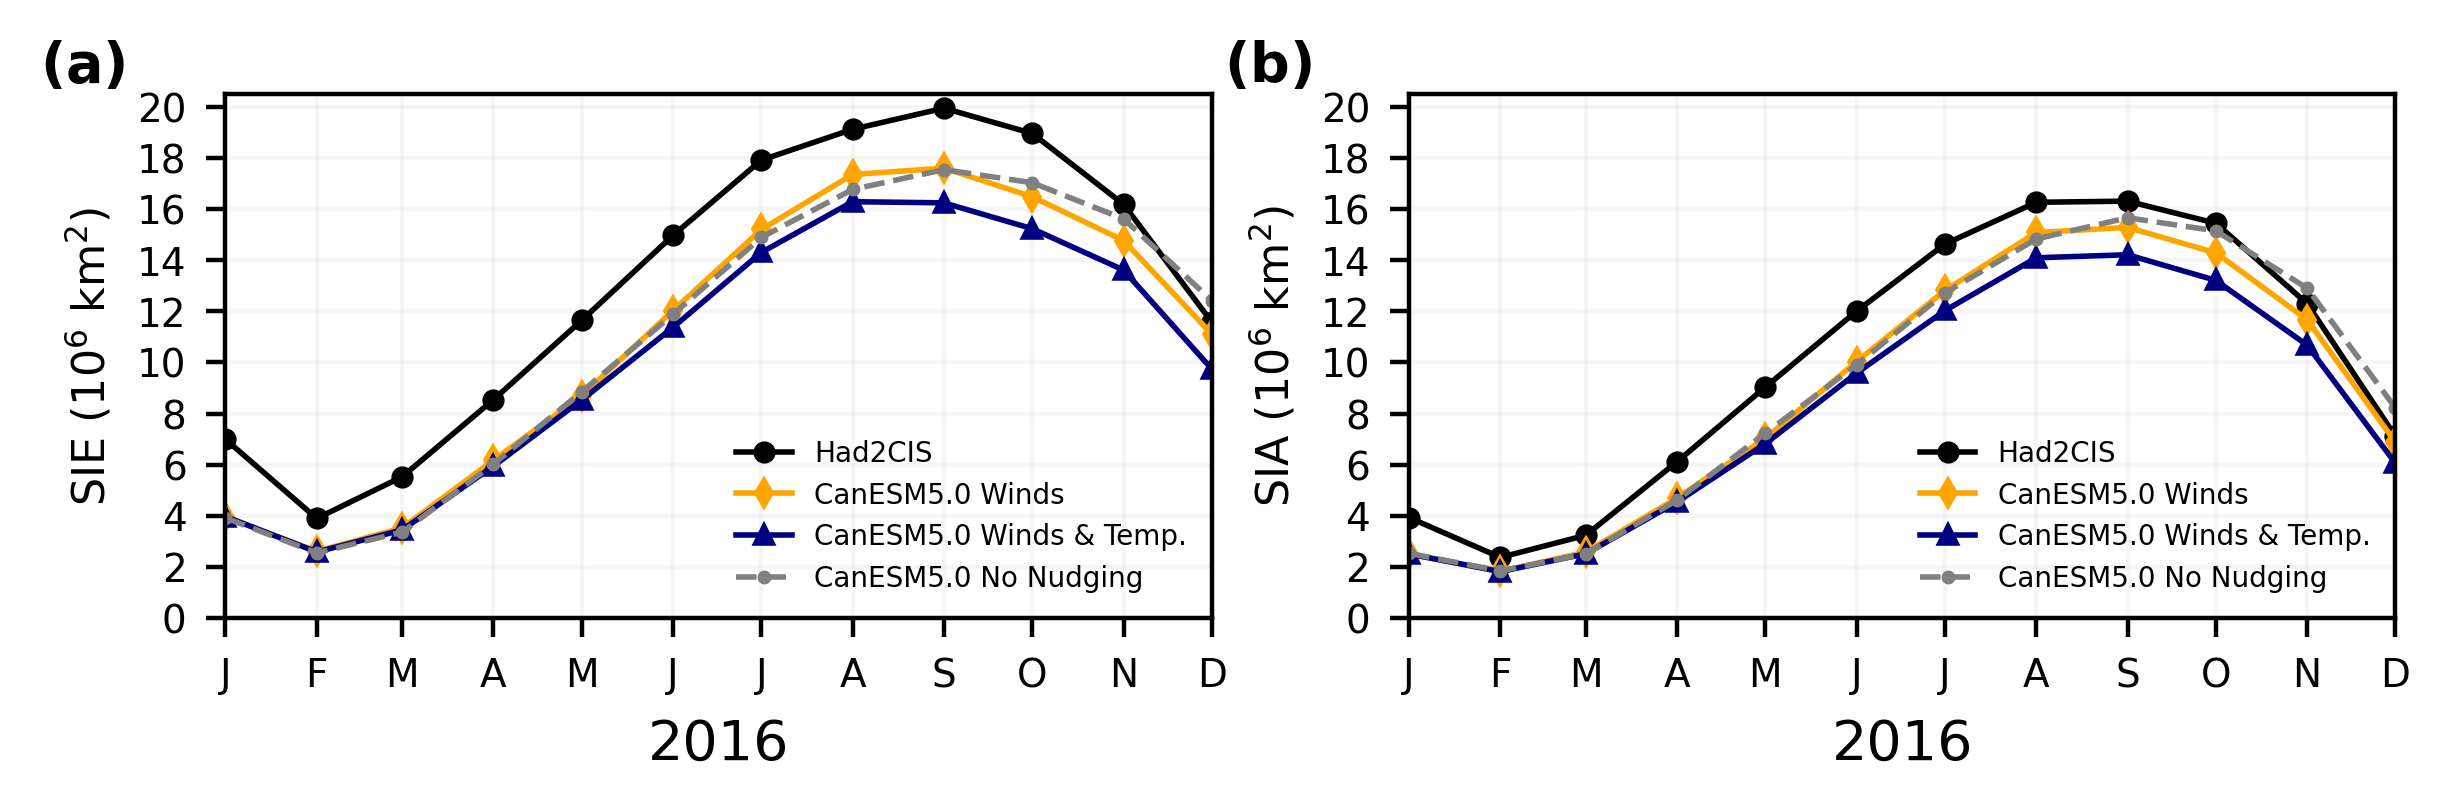

In [10]:
fix,ax=plt.subplots(1,2,figsize=(7,1.7),dpi=400,sharey=False,facecolor='white')

timeseries = [sie_Had2CIS, sie_CanESM5_iwn, sie_CanESM5_iwtn, sie_CanESM50_init[0]]
timeseries2 = [sia_Had2CIS, sia_CanESM5_iwn, sia_CanESM5_iwtn, sia_CanESM50_init[0]]
colors = ['black', 'orange', 'navy', 'grey']
linestyles = ['-','-','-','--']
labels = ['Had2CIS','CanESM5.0 Winds','CanESM5.0 Winds & Temp.','CanESM5.0 No Nudging']
markers = ['o','d','^','.']

for i,data in enumerate(timeseries):
    data.where((data['time.year']==2016),drop=True)['SIE'].plot.line(ax=ax[0],color=colors[i],linestyle=linestyles[i],linewidth=1,marker=markers[i],ms=3)
xlabels = monthletters
ax[0].set_xlim(np.datetime64(f"{2016}-01"),np.datetime64(f"{2016}-12"))
ax[0].set_xticks(np.arange(np.datetime64(f"{2016}-01"),np.datetime64(f"{2016+1}-01"),np.timedelta64(1,"M")))
ax[0].set_xticklabels(xlabels,size=7)
ax[0].set_ylim(0,20.5)
ax[0].set_yticks(np.arange(0,22,2))
ax[0].set_yticklabels(np.arange(0,22,2),size=7)
ax[0].set_xlabel(2016)
ax[0].set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)",size=8)
ax[0].grid(alpha=0.1)
ax[0].legend(labels,fontsize=5,frameon=False)

for i,data in enumerate(timeseries2):
    data.where((data['time.year']==2016))['SIA'].plot.line(ax=ax[1],color=colors[i],linestyle=linestyles[i],linewidth=1,marker=markers[i],ms=3)
ax[1].set_xlim(np.datetime64(f"{2016}-01"),np.datetime64(f"{2016}-12"))
ax[1].set_xticks(np.arange(np.datetime64(f"{2016}-01"),np.datetime64(f"{2016+1}-01"),np.timedelta64(1,"M")))
ax[1].set_xticklabels(xlabels,size=7)
ax[1].set_xlabel(2016)
ax[1].set_ylim(0,20.5)
ax[1].set_yticks(np.arange(0,22,2))
ax[1].set_yticklabels(np.arange(0,22,2),size=7)
ax[1].set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)",size=8)
ax[1].grid(alpha=0.1)
ax[1].legend(labels,fontsize=5,frameon=False,loc='lower right')

ax[0].text(16738,21.0,r'$\bf{(a)}$')
ax[1].text(16738,21.0,r'$\bf{(b)}$')
plt.show()


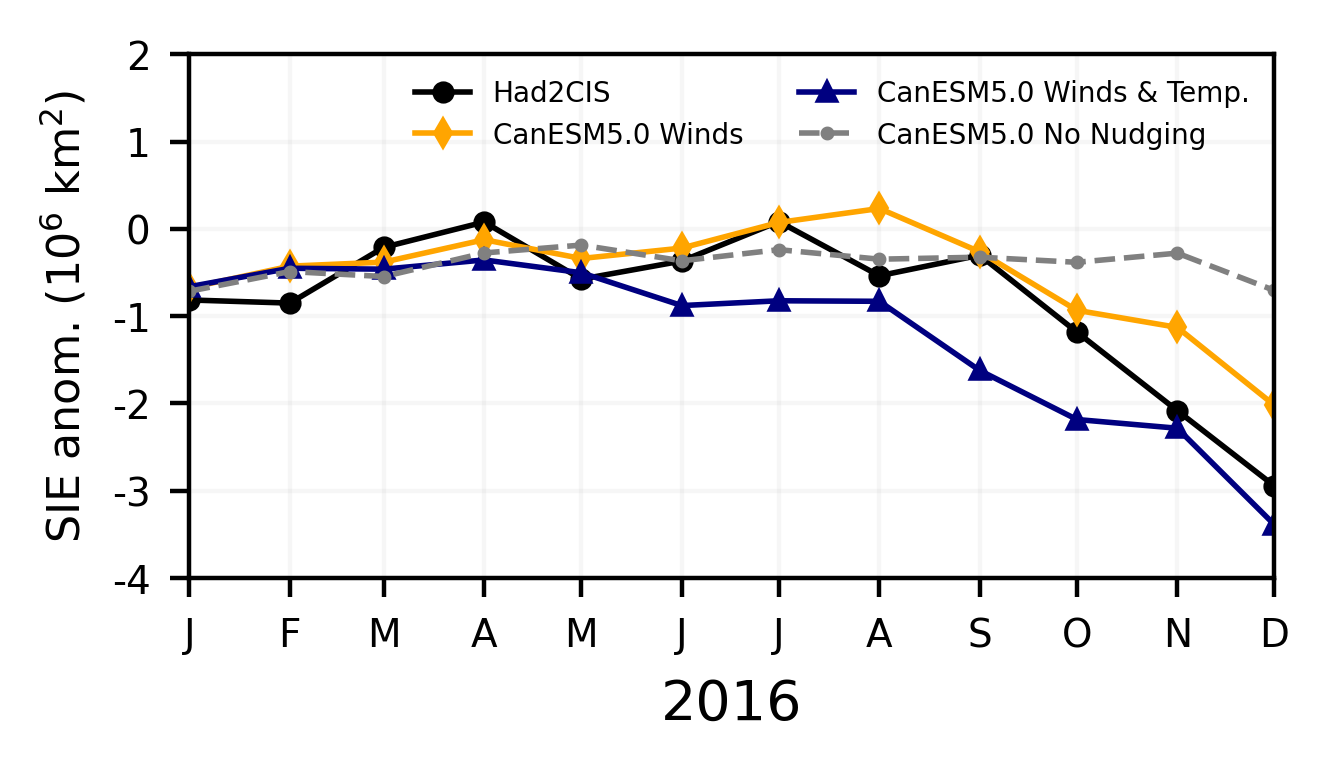

In [11]:
fix,ax=plt.subplots(1,1,figsize=(3.5,1.7),dpi=400,sharey=False,facecolor='white')

timeseries = [sie_anom_Had2CIS, sie_anom_CanESM5_iwn, sie_anom_CanESM5_iwtn, sie_anom_CanESM50_init[0]]
colors = ['black', 'orange', 'navy', 'grey']
linestyles = ['-','-','-','--']
labels = ['Had2CIS','CanESM5.0 Winds','CanESM5.0 Winds & Temp.','CanESM5.0 No Nudging']
markers = ['o','d','^','.']

for i,data in enumerate(timeseries):
    data.where((data['time.year']==2016),drop=True)['SIE'].plot.line(ax=ax,color=colors[i],linestyle=linestyles[i],linewidth=1,marker=markers[i],ms=3)
xlabels = monthletters
ax.set_xlim(np.datetime64(f"{2016}-01"),np.datetime64(f"{2016}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{2016}-01"),np.datetime64(f"{2016+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels,size=7)
ax.set_ylim(-4,2)
ax.set_yticks(np.arange(-4,3,1))
ax.set_yticklabels(np.arange(-4,3,1),size=7)
ax.set_xlabel(2016)
ax.set_ylabel(r"SIE anom. ($10^6\ \mathrm{km}^2$)",size=8)
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=5,frameon=False,ncols=2,loc='upper right')

plt.show()

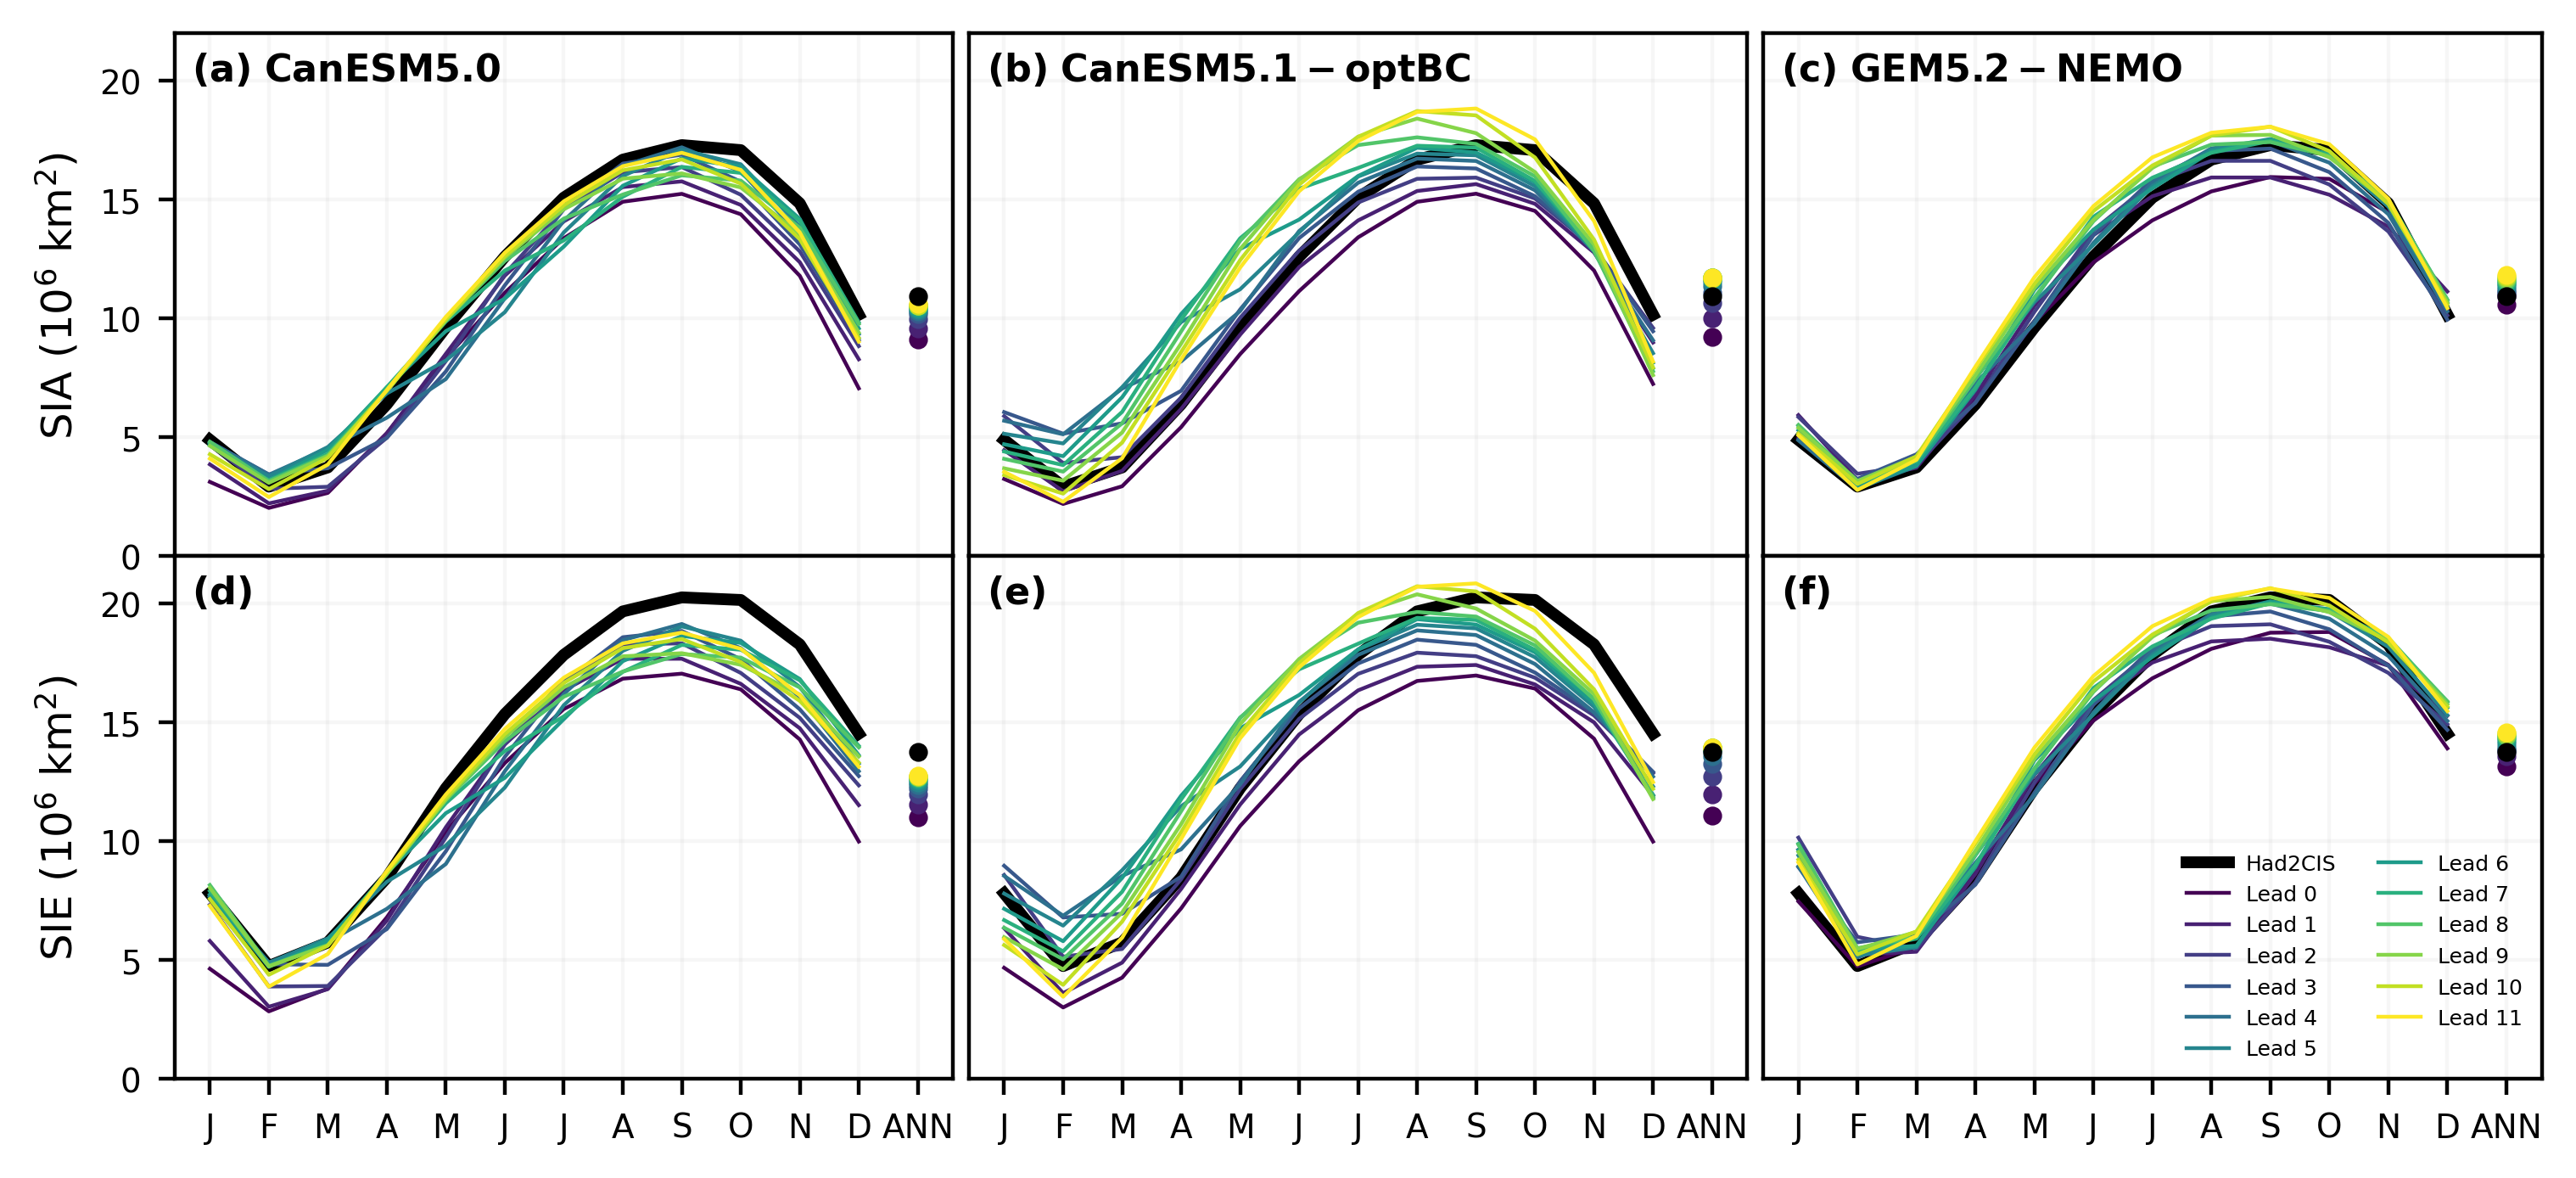

In [19]:
fix,ax=plt.subplots(nrows=2,ncols=3,figsize=(9,4),sharey=True,sharex=True,dpi=400)

# The data to be plotted. Labels for legend are defined in a previous cell.
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# ===============================SIA====================================
ax[0][0].plot(sia_clim_Had2CIS['SIA'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sia_clim_CanESM50_init):
    ax[0][0].plot(data['SIA'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sia_clim_CanESM50_init):
    ax[0][0].plot(12,data['overall_mean'].values,'.',color=colors[i])
ax[0][0].plot(12,sia_clim_Had2CIS['overall_mean'].values,'.',color='black')
ax[0][0].set_yticks(np.arange(0,25,5))
ax[0][0].set_yticklabels(np.arange(0,25,5),size=7)
ax[0][0].set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)",size=9)
ax[0][0].grid(alpha=0.1)
ax[0][0].set_ylim(0,22)

ax[0][1].plot(sia_clim_Had2CIS['SIA'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sia_clim_CanESM5_init):
    ax[0][1].plot(data['SIA'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sia_clim_CanESM5_init):
    ax[0][1].plot(12,data['overall_mean'].values,'.',color=colors[i])
ax[0][1].plot(12,sia_clim_Had2CIS['overall_mean'].values,'.',color='black')
ax[0][1].grid(alpha=0.1)
ax[0][1].tick_params(axis='y',length=0)

ax[0][2].plot(sia_clim_Had2CIS['SIA'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sia_clim_GEM5NEMO_init):
    ax[0][2].plot(data['SIA'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sia_clim_GEM5NEMO_init):
    ax[0][2].plot(12,data['overall_mean'].values,'.',color=colors[i])
ax[0][2].plot(12,sia_clim_Had2CIS['overall_mean'].values,'.',color='black')
ax[0][2].grid(alpha=0.1)
ax[0][2].tick_params(axis='y',length=0)

# ===============================SIE====================================
ax[1][0].plot(sie_clim_Had2CIS['SIE'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sie_clim_CanESM50_init):
    ax[1][0].plot(data['SIE'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sie_clim_CanESM50_init):
    ax[1][0].plot(12,data['overall_mean'].values,'.',color=colors[i])
ax[1][0].plot(12,sie_clim_Had2CIS['overall_mean'].values,'.',color='black')
ax[1][0].set_xticks(np.arange(13))
ax[1][0].set_xticklabels(xticklabels,size=7)
ax[1][0].set_yticks(np.arange(0,25,5))
ax[1][0].set_yticklabels(np.arange(0,25,5),size=7)
ax[1][0].set_xlabel(None)
ax[1][0].set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)",size=9)
ax[1][0].grid(alpha=0.1)

ax[1][1].plot(sie_clim_Had2CIS['SIE'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sie_clim_CanESM5_init):
    ax[1][1].plot(data['SIE'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sie_clim_CanESM5_init):
    ax[1][1].plot(12,data['overall_mean'].values,'.',color=colors[i])
ax[1][1].plot(12,sie_clim_Had2CIS['overall_mean'].values,'.',color='black')
ax[1][1].set_xticks(np.arange(13))
ax[1][1].set_xticklabels(xticklabels,size=7)
ax[1][1].set_xlabel(None)
ax[1][1].grid(alpha=0.1)
ax[1][1].tick_params(axis='y',length=0)

# Plot the data
ax[1][2].plot(sie_clim_Had2CIS['SIE'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sie_clim_GEM5NEMO_init):
    ax[1][2].plot(data['SIE'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sie_clim_GEM5NEMO_init):
    ax[1][2].plot(12,data['overall_mean'].values,'.',color=colors[i])
ax[1][2].plot(12,sie_clim_Had2CIS['overall_mean'].values,'.',color='black')
ax[1][2].set_xticks(np.arange(13))
ax[1][2].set_xticklabels(xticklabels,size=7)
ax[1][2].set_xlabel(None)
ax[1][2].grid(alpha=0.1)
ax[1][2].legend(labels,ncols=2,fontsize=4.5,frameon=False)
ax[1][2].tick_params(axis='y',length=0)

ax[0][0].text(-.3,20,r'$\bf{(a)\ CanESM5.0}$',size=8)
ax[0][1].text(-.3,20,r'$\bf{(b)\ CanESM5.1-optBC}$',size=8)
ax[0][2].text(-.3,20,r'$\bf{(c)\ GEM5.2-NEMO}$',size=8)
ax[1][0].text(-.3,20,r'$\bf{(d)}$',size=8)
ax[1][1].text(-.3,20,r'$\bf{(e)}$',size=8)
ax[1][2].text(-.3,20,r'$\bf{(f)}$',size=8)

plt.subplots_adjust(wspace=0.02,hspace=0)
plt.show()

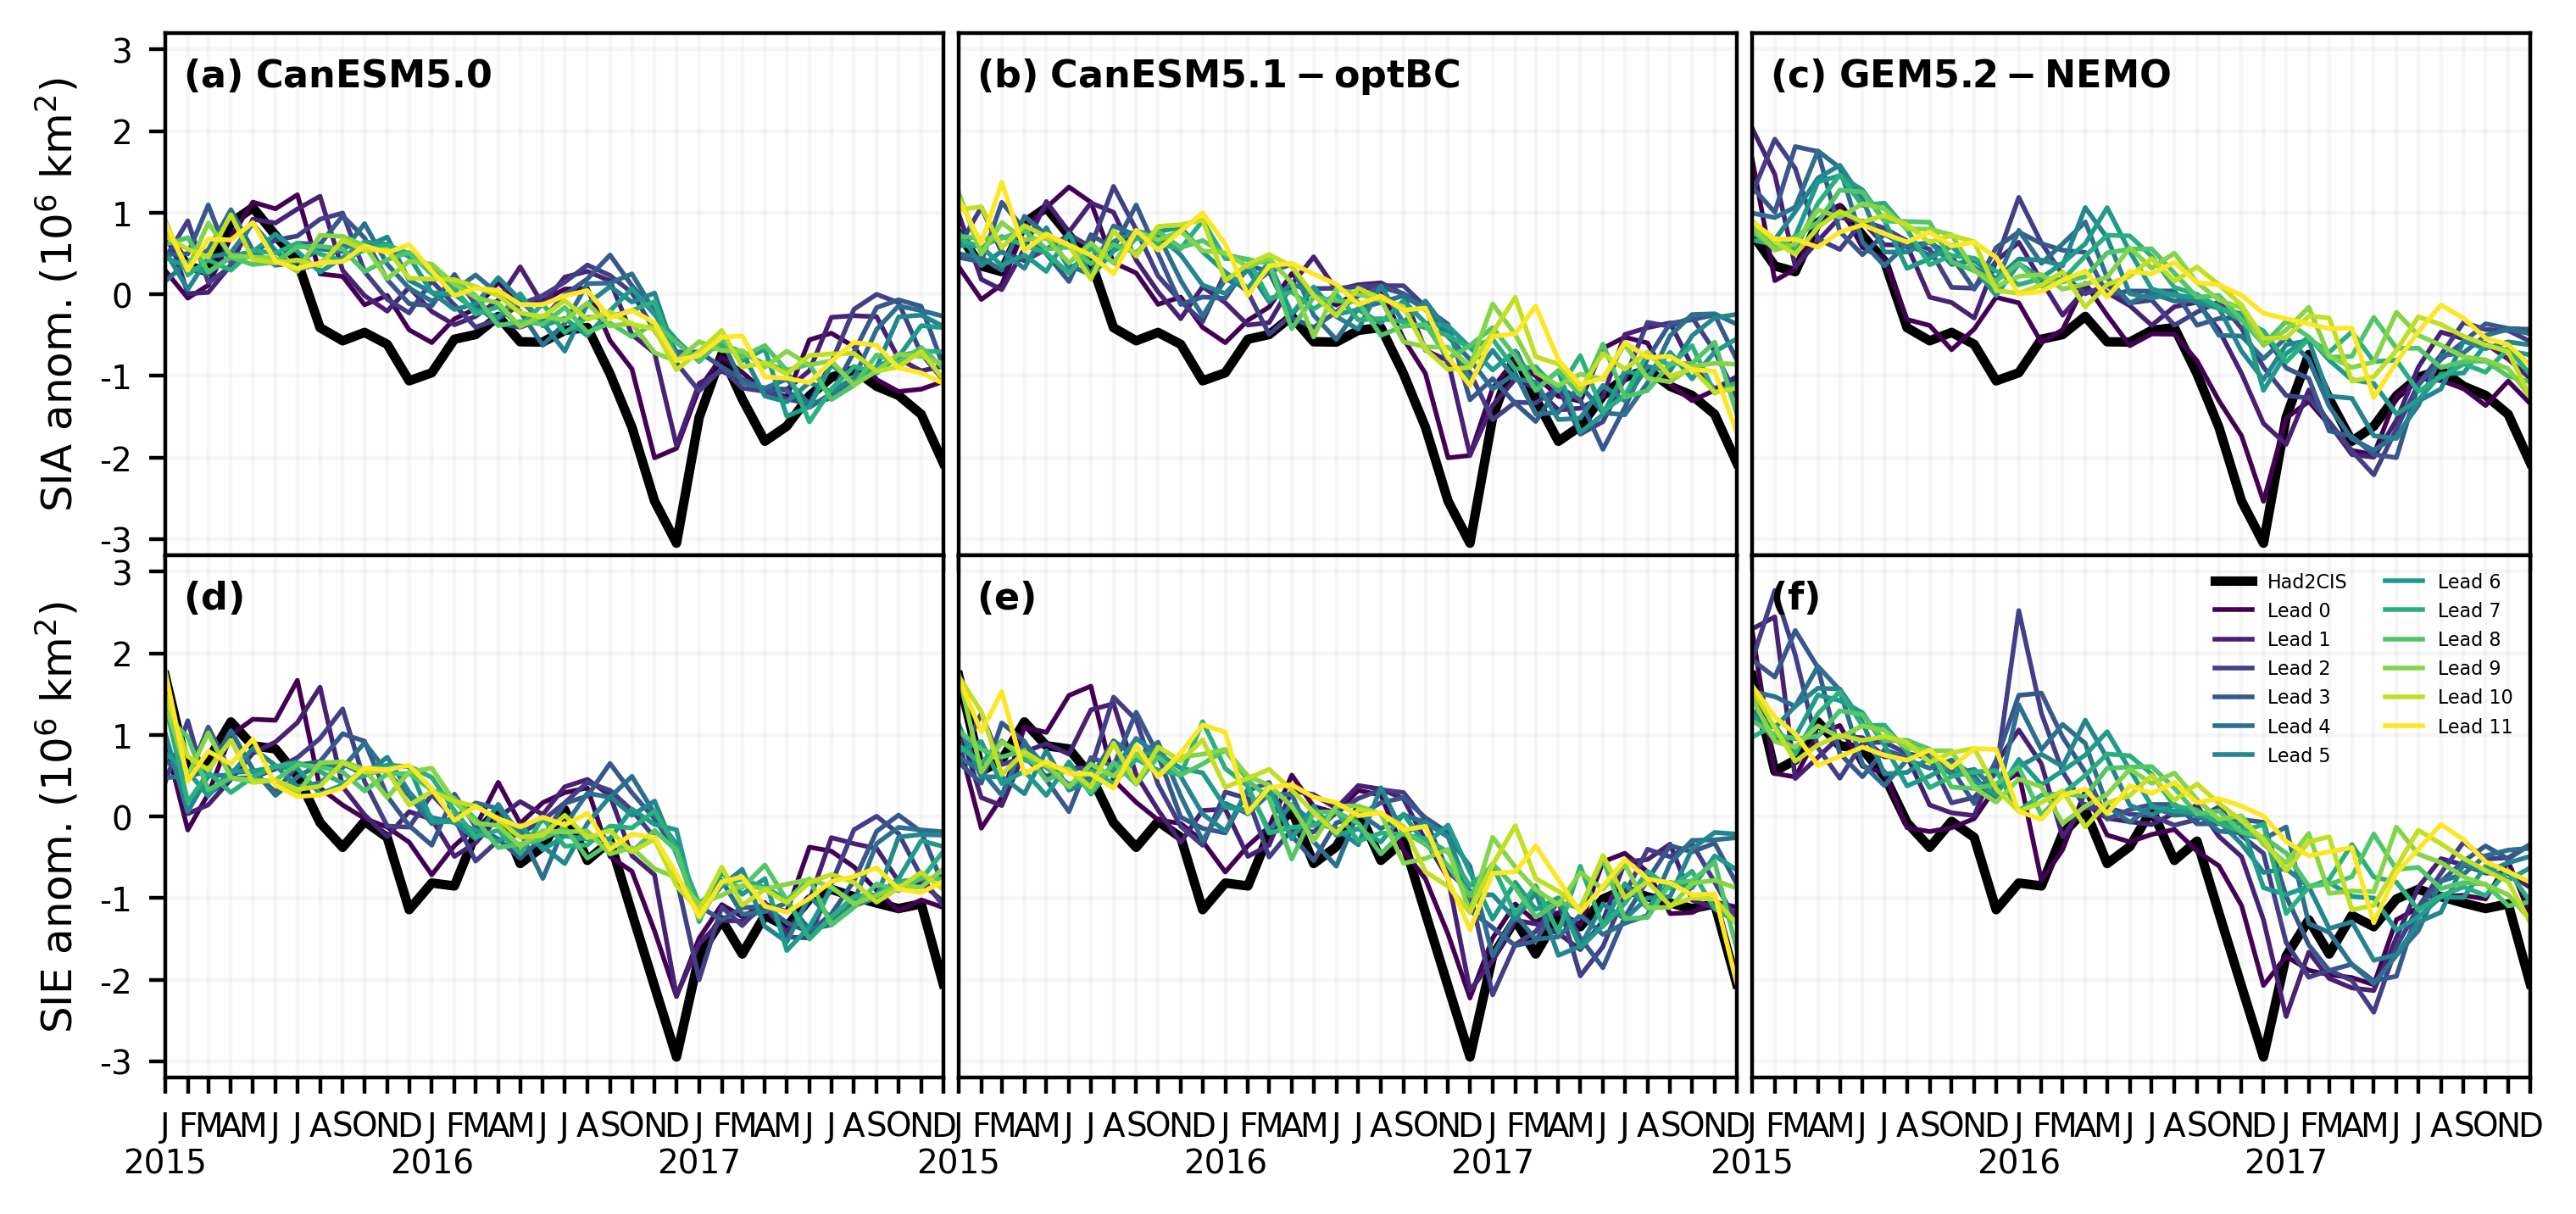

In [21]:
fix,ax=plt.subplots(nrows=2,ncols=3,figsize=(9,4),sharey=True,sharex=True,dpi=400)

# The data to be plotted. Labels for legend are defined in a previous cell.
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']
y0,y1 = [2015,2017]
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'


for j in range(3):
    sia_anom_Had2CIS['SIA'].where((sia_anom_Had2CIS['time.year']>=y0) & (sia_anom_Had2CIS['time.year']<=y1),drop=True).plot.line(ax=ax[0][j],linewidth=2,color='black')
    sie_anom_Had2CIS['SIE'].where((sie_anom_Had2CIS['time.year']>=y0) & (sie_anom_Had2CIS['time.year']<=y1),drop=True).plot.line(ax=ax[1][j],linewidth=2,color='black')

# ===============================SIA====================================
for i,data in enumerate(sia_anom_CanESM50_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIA'].plot.line(ax=ax[0][0],color=colors[i],linewidth=1)
ax[0][0].set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax[0][0].set_yticks(np.arange(0,25,5))
ax[0][0].set_yticklabels(np.arange(0,25,5),size=7)
ax[0][0].set_ylabel(r"SIA anom. ($10^6\ \mathrm{km}^2$)",size=9)
ax[0][0].grid(alpha=0.1)
ax[0][0].set_ylim(0,22)

for i,data in enumerate(sia_anom_CanESM5_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIA'].plot.line(ax=ax[0][1],color=colors[i],linewidth=1)
ax[0][1].grid(alpha=0.1)
ax[0][1].tick_params(axis='y',length=0)
ax[0][1].set_xlabel(None)
ax[0][1].set_ylabel(None)

for i,data in enumerate(sia_anom_GEM5NEMO_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIA'].plot.line(ax=ax[0][2],color=colors[i],linewidth=1)
ax[0][2].grid(alpha=0.1)
ax[0][2].tick_params(axis='y',length=0)
ax[0][2].set_xlabel(None)
ax[0][2].set_ylabel(None)

# ===============================SIE====================================
for i,data in enumerate(sie_anom_CanESM50_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax[1][0],color=colors[i],linewidth=1)
ax[1][0].set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax[1][0].set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax[1][0].set_xticklabels(xlabels,size=7)
ax[1][0].set_ylim(-3.2,3.05)
ax[1][0].set_yticks(np.arange(-3,3+1,1))
ax[1][0].set_yticklabels(np.arange(-3,3+1,1),size=7)
ax[1][0].set_xlabel(None)
ax[1][0].set_ylabel(r"SIE anom. ($10^6\ \mathrm{km}^2$)",size=9)
ax[1][0].grid(alpha=0.1)

for i,data in enumerate(sie_anom_CanESM5_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax[1][1],color=colors[i],linewidth=1)
ax[1][1].set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax[1][1].set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax[1][1].set_xticklabels(xlabels,size=7)
ax[1][1].set_xlabel(None)
ax[1][1].set_ylabel(None)
ax[1][1].grid(alpha=0.1)
ax[1][1].tick_params(axis='y',length=0)

# Plot the data
for i,data in enumerate(sie_anom_GEM5NEMO_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax[1][2],color=colors[i],linewidth=1)
ax[1][2].set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax[1][2].set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax[1][2].set_xticklabels(xlabels,size=7)
ax[1][2].set_xlabel(None)
ax[1][2].set_ylabel(None)
ax[1][2].grid(alpha=0.1)
ax[1][2].legend(labels,ncols=2,fontsize=4,frameon=False)
ax[1][2].tick_params(axis='y',length=0)
ax[1][2].set_ylim(-3.2,3.2)

ax[0][0].text(16460,2.55,r'$\bf{(a)\ CanESM5.0}$',size=8)
ax[0][1].text(16460,2.55,r'$\bf{(b)\ CanESM5.1-optBC}$',size=8)
ax[0][2].text(16460,2.55,r'$\bf{(c)\ GEM5.2-NEMO}$',size=8)
ax[1][0].text(16460,2.55,r'$\bf{(d)}$',size=8)
ax[1][1].text(16460,2.55,r'$\bf{(e)}$',size=8)
ax[1][2].text(16460,2.55,r'$\bf{(f)}$',size=8)

plt.subplots_adjust(wspace=0.02,hspace=0)
plt.show()


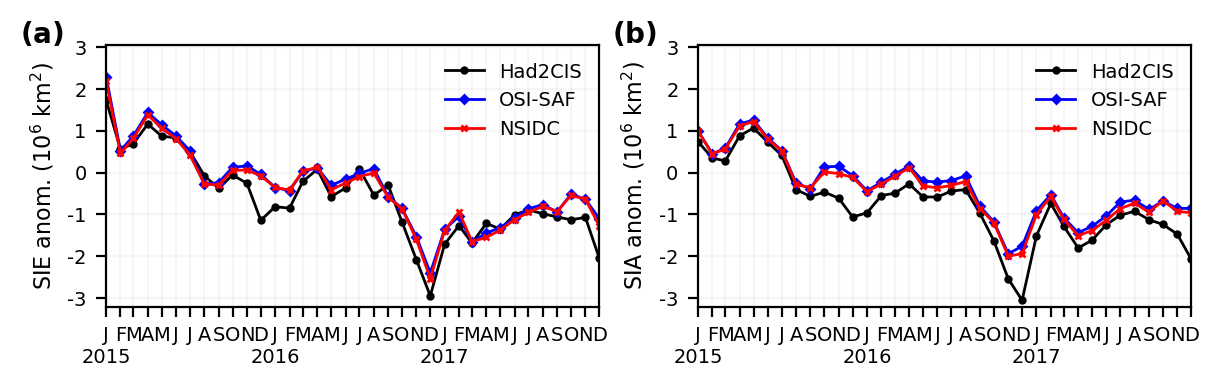

In [14]:
fix,ax=plt.subplots(1,2,figsize=(7,1.7),dpi=200,sharey=False,facecolor='white')

timeseries = [sie_anom_Had2CIS, sie_anom_OSISAF, sie_anom_NSIDC]
timeseries2 = [sia_anom_Had2CIS, sia_anom_OSISAF, sia_anom_NSIDC]
colors = ['black', 'blue', 'red']
linestyles = ['-','-','-']
labels = ['Had2CIS','OSI-SAF','NSIDC']
markers = ['o','D','x']
y0,y1 = [2015,2017]

for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax[0],color=colors[i],linestyle=linestyles[i],linewidth=1,marker=markers[i],ms=2)
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax[0].set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax[0].set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax[0].set_xticklabels(xlabels,size=7)
ax[0].set_ylim(-3.2,3.05)
ax[0].set_yticks(np.arange(-3,3+1,1))
ax[0].set_yticklabels(np.arange(-3,3+1,1),size=7)
ax[0].set_xlabel(None)
ax[0].set_ylabel(r"SIE anom. ($10^6\ \mathrm{km}^2$)",size=8)
ax[0].grid(alpha=0.1)
ax[0].legend(labels,fontsize=7,frameon=False)

for i,data in enumerate(timeseries2):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIA'].plot.line(ax=ax[1],color=colors[i],linestyle=linestyles[i],linewidth=1,marker=markers[i],ms=2)
ax[1].set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax[1].set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax[1].set_xticklabels(xlabels,size=7)
ax[1].set_ylim(-3.2,3.05)
ax[1].set_xlabel(None)
ax[1].set_yticks(np.arange(-3,3+1,1))
ax[1].set_yticklabels(np.arange(-3,3+1,1),size=7)
ax[1].set_ylabel(r"SIA anom. ($10^6\ \mathrm{km}^2$)",size=8)
ax[1].grid(alpha=0.1)
ax[1].legend(labels,fontsize=7,frameon=False)

ax[0].text(16250,3.1,r'$\bf{(a)}$')
ax[1].text(16250,3.1,r'$\bf{(b)}$')
plt.show()

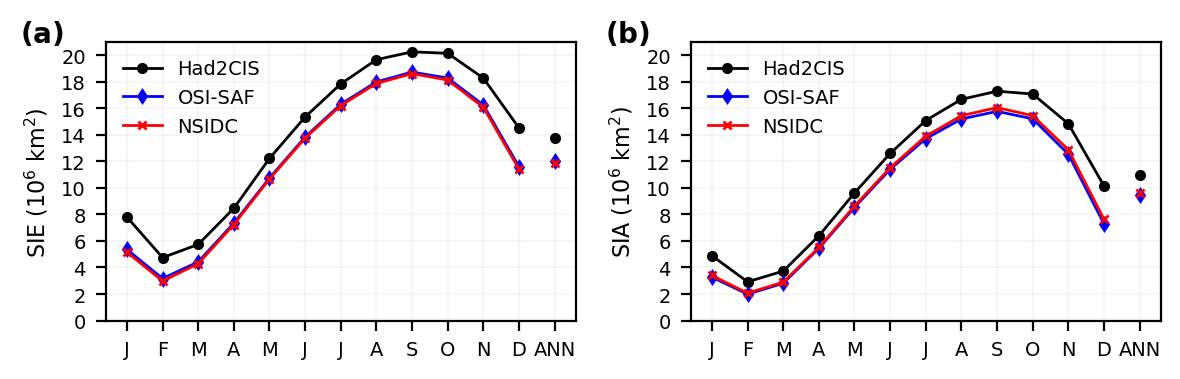

In [15]:
fix,ax=plt.subplots(1,2,figsize=(6,2),dpi=200,sharey=False,facecolor='white')

timeseries = [sie_clim_Had2CIS, sie_clim_OSISAF, sie_clim_NSIDC]
timeseries2 = [sia_clim_Had2CIS, sia_clim_OSISAF, sia_clim_NSIDC]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'blue', 'red']
linestyles = ['-','-','-']
labels = ['Had2CIS','OSI-SAF','NSIDC']
markers = ['o','d','x']

for i,data in enumerate(timeseries):
    ax[0].plot(data['SIE'].values,color=colors[i],label=labels[i],marker=markers[i],ms=3,lw=1)
for i,data in enumerate(timeseries):
    ax[0].plot(12,data['overall_mean'].values,marker=markers[i],color=colors[i],ms=3)
ax[0].set_xticks(np.arange(13))
ax[0].set_xticklabels(xticklabels,size=7)
ax[0].set_ylim(0,21)
ax[0].set_yticks(np.arange(0,22,2))
ax[0].set_yticklabels(np.arange(0,22,2),size=7)
ax[0].set_xlabel(None)
ax[0].set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)",size=8)
ax[0].grid(alpha=0.1)
ax[0].legend(labels,fontsize=7,frameon=False)

for i,data in enumerate(timeseries2):
    ax[1].plot(data['SIA'].values,color=colors[i],label=labels[i],marker=markers[i],ms=3,lw=1)
for i,data in enumerate(timeseries2):
    ax[1].plot(12,data['overall_mean'].values,marker=markers[i],color=colors[i],ms=3)
ax[1].set_xticks(np.arange(13))
ax[1].set_xticklabels(xticklabels,size=7)
ax[1].set_ylim(0,21)
ax[1].set_xlabel(None)
ax[1].set_yticks(np.arange(0,22,2))
ax[1].set_yticklabels(np.arange(0,22,2),size=7)
ax[1].set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)",size=8)
ax[1].grid(alpha=0.1)
ax[1].legend(labels,fontsize=7,frameon=False)

ax[0].text(-3,21,r'$\bf{(a)}$')
ax[1].text(-3,21,r'$\bf{(b)}$')
plt.subplots_adjust(wspace=.0)
plt.tight_layout()
plt.show()

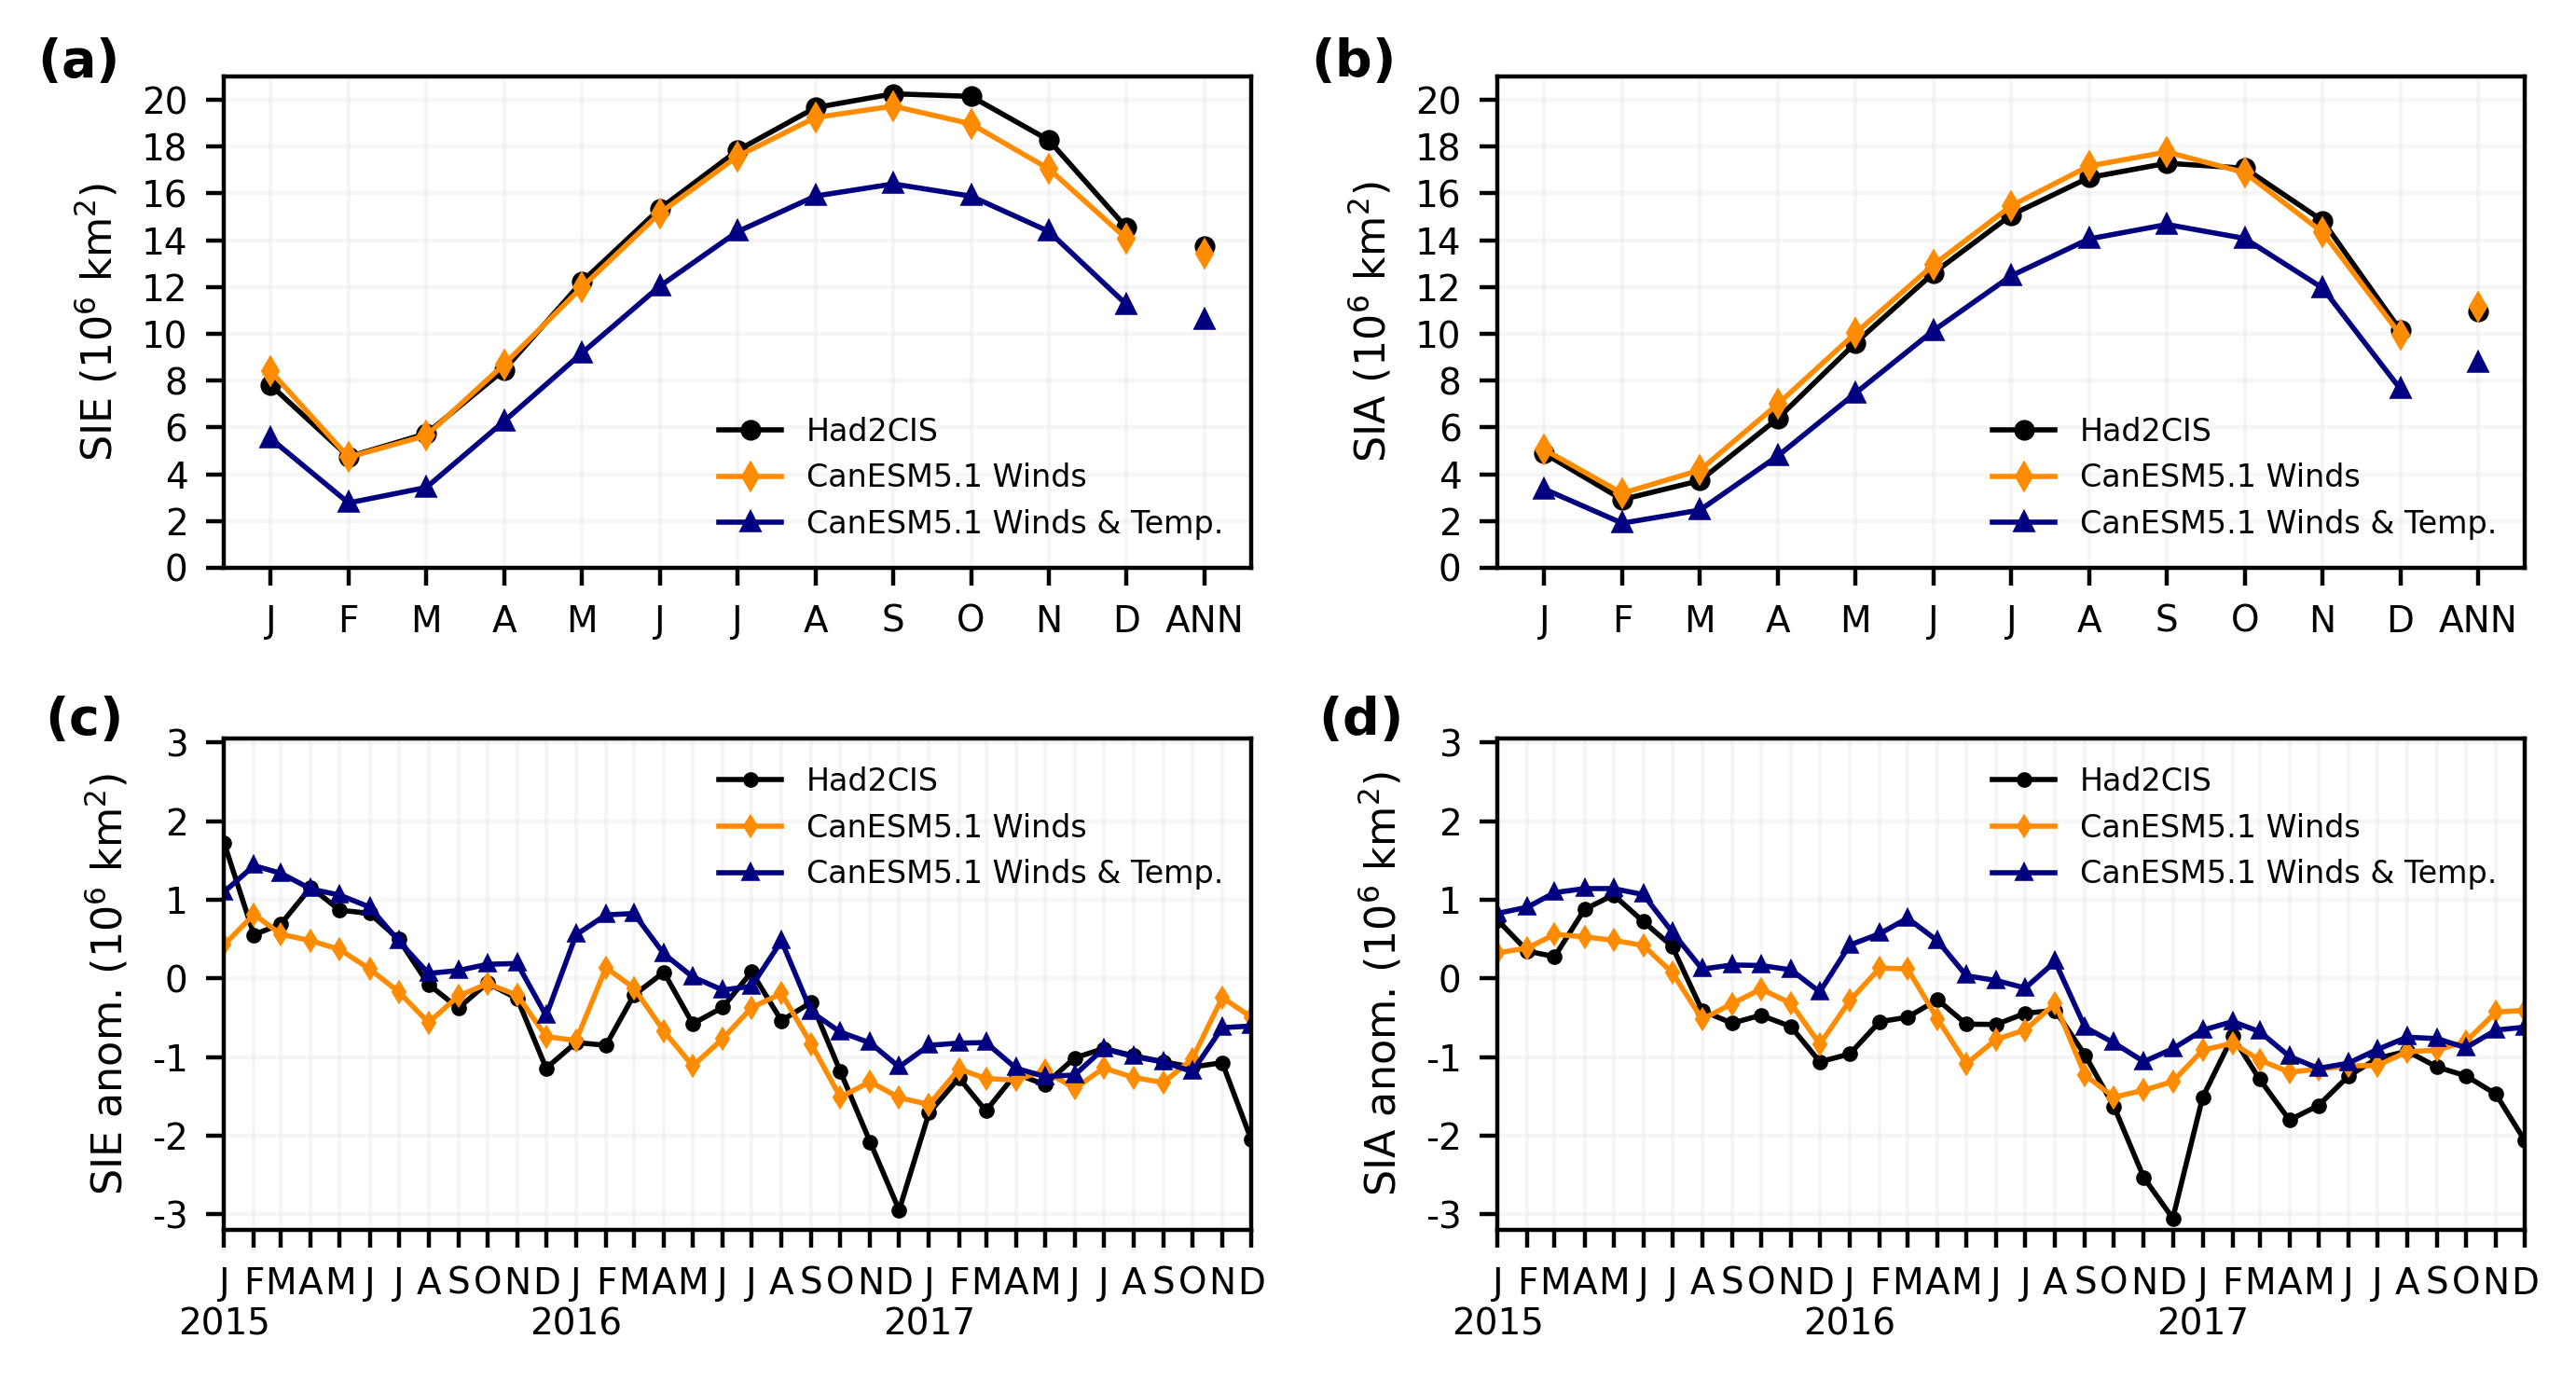

In [16]:
fix,ax=plt.subplots(2,2,figsize=(7,3.8),dpi=400,sharey=False,facecolor='white')
ax = ax[::-1]
timeseries = [sie_anom_Had2CIS, sie_anom_CanESM5_wn1950, sie_anom_CanESM5_wtn1950]
timeseries2 = [sia_anom_Had2CIS, sia_anom_CanESM5_wn1950, sia_anom_CanESM5_wtn1950]
colors = ['black', 'darkorange', 'navy']
linestyles = ['-','-','-']
labels = ['Had2CIS','CanESM5.1 Winds', 'CanESM5.1 Winds & Temp.']
markers = ['o','d','^']
y0,y1 = [2015,2017]

for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax[0][0],color=colors[i],linestyle=linestyles[i],linewidth=1,marker=markers[i],ms=2)
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax[0][0].set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax[0][0].set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax[0][0].set_xticklabels(xlabels,size=7)
ax[0][0].set_ylim(-3.2,3.05)
ax[0][0].set_yticks(np.arange(-3,3+1,1))
ax[0][0].set_yticklabels(np.arange(-3,3+1,1),size=7)
ax[0][0].set_xlabel(None)
ax[0][0].set_ylabel(r"SIE anom. ($10^6\ \mathrm{km}^2$)",size=8)
ax[0][0].grid(alpha=0.1)
ax[0][0].legend(labels,fontsize=6,frameon=False)

for i,data in enumerate(timeseries2):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIA'].plot.line(ax=ax[0][1],color=colors[i],linestyle=linestyles[i],linewidth=1,marker=markers[i],ms=2)
ax[0][1].set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax[0][1].set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax[0][1].set_xticklabels(xlabels,size=7)
ax[0][1].set_ylim(-3.2,3.05)
ax[0][1].set_xlabel(None)
ax[0][1].set_yticks(np.arange(-3,3+1,1))
ax[0][1].set_yticklabels(np.arange(-3,3+1,1),size=7)
ax[0][1].set_ylabel(r"SIA anom. ($10^6\ \mathrm{km}^2$)",size=8)
ax[0][1].grid(alpha=0.1)
ax[0][1].legend(labels,fontsize=6,frameon=False)

ax[0][0].text(16250,3.1,r'$\bf{(c)}$')
ax[0][1].text(16250,3.1,r'$\bf{(d)}$')

timeseries = [sie_clim_Had2CIS, sie_clim_CanESM5_wn1950, sie_clim_CanESM5_wtn1950]
timeseries2 = [sia_clim_Had2CIS, sia_clim_CanESM5_wn1950, sia_clim_CanESM5_wtn1950]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'darkorange', 'navy']
linestyles = ['-','-','-']
markers = ['o','d','^']

for i,data in enumerate(timeseries):
    ax[1][0].plot(data['SIE'].values,color=colors[i],label=labels[i],marker=markers[i],ms=3,lw=1)
for i,data in enumerate(timeseries):
    ax[1][0].plot(12,data['overall_mean'].values,marker=markers[i],color=colors[i],ms=3)
ax[1][0].set_xticks(np.arange(13))
ax[1][0].set_xticklabels(xticklabels,size=7)
ax[1][0].set_ylim(0,21)
ax[1][0].set_yticks(np.arange(0,22,2))
ax[1][0].set_yticklabels(np.arange(0,22,2),size=7)
ax[1][0].set_xlabel(None)
ax[1][0].set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)",size=8)
ax[1][0].grid(alpha=0.1)
ax[1][0].legend(labels,fontsize=6,frameon=False)

for i,data in enumerate(timeseries2):
    ax[1][1].plot(data['SIA'].values,color=colors[i],label=labels[i],marker=markers[i],ms=3,lw=1)
for i,data in enumerate(timeseries2):
    ax[1][1].plot(12,data['overall_mean'].values,marker=markers[i],color=colors[i],ms=3)
ax[1][1].set_xticks(np.arange(13))
ax[1][1].set_xticklabels(xticklabels,size=7)
ax[1][1].set_ylim(0,21)
ax[1][1].set_xlabel(None)
ax[1][1].set_yticks(np.arange(0,22,2))
ax[1][1].set_yticklabels(np.arange(0,22,2),size=7)
ax[1][1].set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)",size=8)
ax[1][1].grid(alpha=0.1)
ax[1][1].legend(labels,fontsize=6,frameon=False)

ax[1][0].text(-3,21,r'$\bf{(a)}$')
ax[1][1].text(-3,21,r'$\bf{(b)}$')
plt.subplots_adjust(wspace=.0)
plt.tight_layout()
plt.show()

In [17]:
a = sie_anom_CanESM5_wn1950.where((sie_anom_CanESM5_wn1950['time.year']>=1990)&(sie_anom_CanESM5_wn1950['time.year']<=2020),drop=True)['SIE'].values
b = sie_anom_CanESM5_wtn1950.where((sie_anom_CanESM5_wtn1950['time.year']>=1990)&(sie_anom_CanESM5_wtn1950['time.year']<=2020),drop=True)['SIE'].values
c = sie_anom_Had2CIS.where((sie_anom_Had2CIS['time.year']>=1990)&(sie_anom_Had2CIS['time.year']<=2020),drop=True)['SIE'].values
print(np.corrcoef(a,c)[0,1], np.corrcoef(b,c)[0,1])

0.5009146424893138 0.6449131708112504


In [18]:
a = sia_anom_CanESM5_wn1950.where((sia_anom_CanESM5_wn1950['time.year']>=1990)&(sia_anom_CanESM5_wn1950['time.year']<=2020),drop=True)['SIA'].values
b = sia_anom_CanESM5_wtn1950.where((sia_anom_CanESM5_wtn1950['time.year']>=1990)&(sia_anom_CanESM5_wtn1950['time.year']<=2020),drop=True)['SIA'].values
c = sia_anom_Had2CIS.where((sia_anom_Had2CIS['time.year']>=1990)&(sia_anom_Had2CIS['time.year']<=2020),drop=True)['SIA'].values
print(np.corrcoef(a,c)[0,1], np.corrcoef(b,c)[0,1])

0.5399212830064944 0.6797017197479366
